In [132]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/data-kiem-tra-2/data-kiem-tra-2.csv


In [133]:
# !pip install pmdarima

In [134]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", "use_inf_as_na")
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
import random
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error, r2_score
from pmdarima import auto_arima

In [135]:
df = pd.read_csv('/kaggle/input/data-kiem-tra-2/data-kiem-tra-2.csv',encoding='latin-1', sep=',')
df

,date,truong_1,truong_2,truong_3,truong_4,truong_5
0,10.05.2013,4,58,3773,299.0,1
1,26.05.2013,4,58,3768,249.0,1
2,19.05.2013,4,58,4036,419.0,1
3,25.05.2013,4,58,12878,149.0,1
4,15.05.2013,4,58,12885,148.0,1
...,...,...,...,...,...,...
550033,07.11.2013,10,37,18474,199.0,1
550034,18.11.2013,10,37,18474,199.0,1
550035,24.11.2013,10,37,18484,199.0,1
550036,11.11.2013,10,37,19751,99.0,1


- Biến đổi cột 'date' từ type là object sang datetime

In [136]:
df['date'] = pd.to_datetime(df['date'], format='%d.%m.%Y')

- Cộng dồn những giá trị lặp theo ngày

In [137]:
df = df.groupby(['date']).sum().reset_index()
df

,date,truong_1,truong_2,truong_3,truong_4,truong_5
0,2013-05-01,5868,42989,15073926,8.699411e+05,1635
1,2013-05-02,5352,39975,14127032,8.025867e+05,1503
2,2013-05-03,5136,38414,13050413,8.121575e+05,1413
3,2013-05-04,4448,34386,11324760,6.420660e+05,1213
4,2013-05-05,4296,33559,11814357,5.800663e+05,1159
...,...,...,...,...,...,...
209,2013-11-26,4510,13603,5119426,3.712670e+05,548
210,2013-11-27,4050,12428,4821249,3.011002e+05,489
211,2013-11-28,4660,13724,5349662,3.666039e+05,585
212,2013-11-29,7250,21618,8082867,8.222827e+05,1499


- Sắp xếp dữ liệu theo ngày

In [138]:
df = df.sort_values(by='date')
df.index = np.arange(1, len(df)+1)
df

,date,truong_1,truong_2,truong_3,truong_4,truong_5
1,2013-05-01,5868,42989,15073926,8.699411e+05,1635
2,2013-05-02,5352,39975,14127032,8.025867e+05,1503
3,2013-05-03,5136,38414,13050413,8.121575e+05,1413
4,2013-05-04,4448,34386,11324760,6.420660e+05,1213
5,2013-05-05,4296,33559,11814357,5.800663e+05,1159
...,...,...,...,...,...,...
210,2013-11-26,4510,13603,5119426,3.712670e+05,548
211,2013-11-27,4050,12428,4821249,3.011002e+05,489
212,2013-11-28,4660,13724,5349662,3.666039e+05,585
213,2013-11-29,7250,21618,8082867,8.222827e+05,1499


In [139]:
columns = ['truong_1', 'truong_2', 'truong_3', 'truong_4', 'truong_5']
data = df[columns]

- Vẽ biểu đồ heatmap

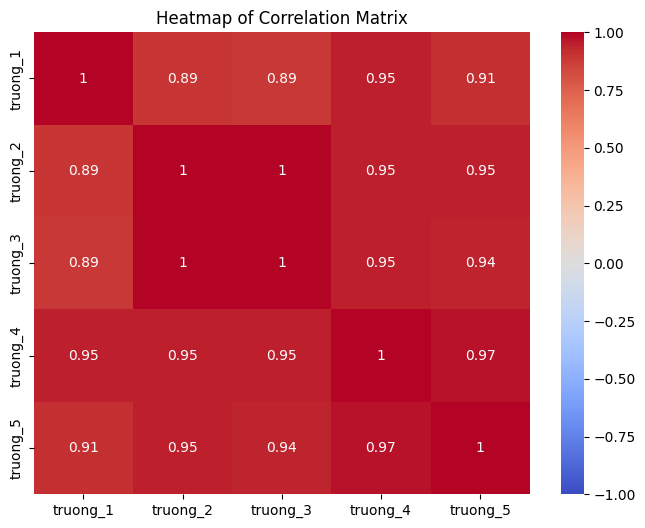

In [140]:
correlation_matrix = data.corr()

# Vẽ biểu đồ heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Heatmap of Correlation Matrix')
plt.show()

- Từ biểu đồ ta thấy giữa các trường có sự tương quan với nhau

- Biểu đồ thể hiện dữ liệu của trường 1 theo thời gian

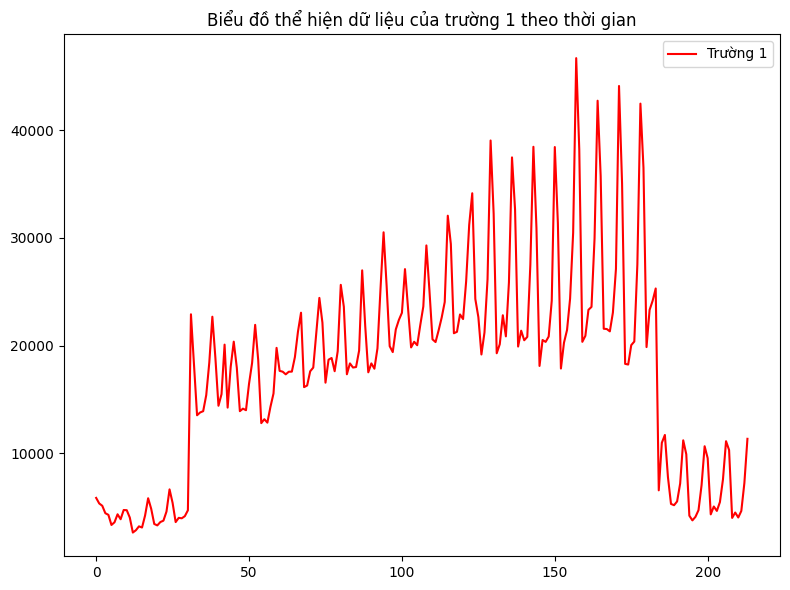

In [141]:
plt.figure(figsize=(8, 6))

plt.plot(range(data['truong_1'].shape[0]), data['truong_1'], 'red', label='Trường 1')
plt.title(f'Biểu đồ thể hiện dữ liệu của trường 1 theo thời gian')
plt.legend()

plt.tight_layout()
plt.show()

- Biểu đồ thể hiện dữ liệu của trường 2 theo thời gian

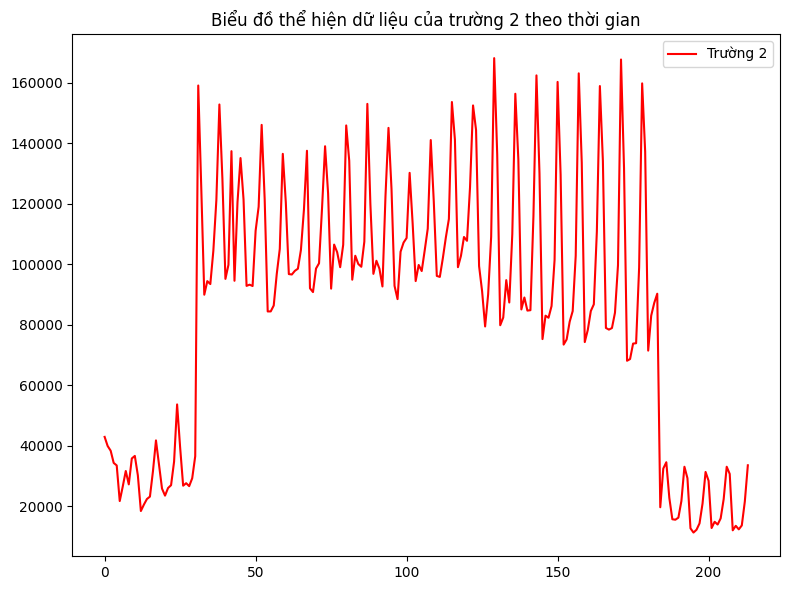

In [142]:
plt.figure(figsize=(8, 6))

plt.plot(range(data['truong_2'].shape[0]), data['truong_2'], 'red', label='Trường 2')
plt.title(f'Biểu đồ thể hiện dữ liệu của trường 2 theo thời gian')
plt.legend()

plt.tight_layout()
plt.show()

- Biểu đồ thể hiện dữ liệu của trường 3 theo thời gian

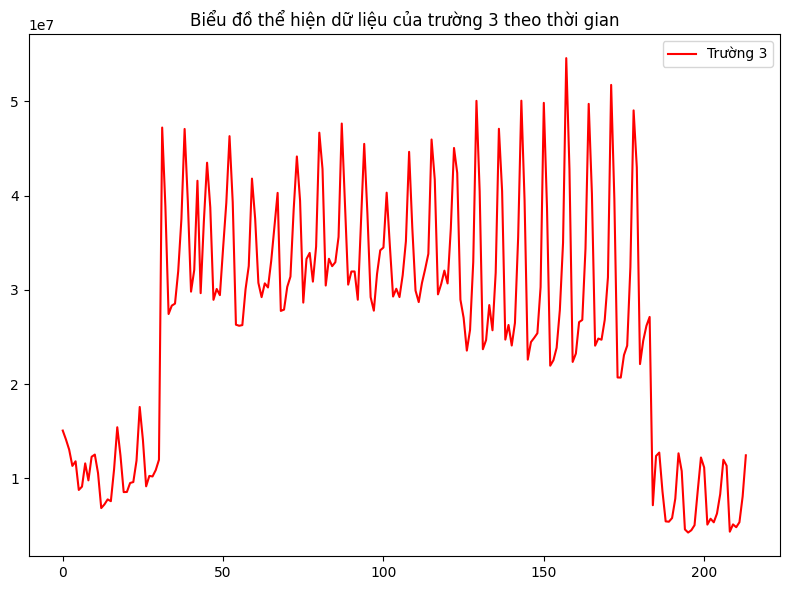

In [143]:
plt.figure(figsize=(8, 6))

plt.plot(range(data['truong_3'].shape[0]), data['truong_3'], 'red', label='Trường 3')
plt.title(f'Biểu đồ thể hiện dữ liệu của trường 3 theo thời gian')
plt.legend()

plt.tight_layout()
plt.show()

- Biểu đồ thể hiện dữ liệu của trường 4 theo thời gian

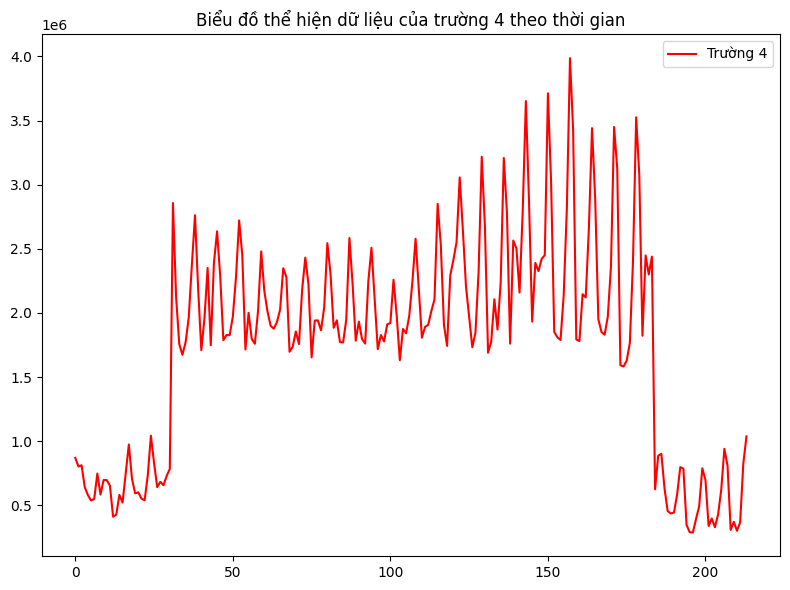

In [144]:
plt.figure(figsize=(8, 6))

plt.plot(range(data['truong_4'].shape[0]), data['truong_4'], 'red', label='Trường 4')
plt.title(f'Biểu đồ thể hiện dữ liệu của trường 4 theo thời gian')
plt.legend()

plt.tight_layout()
plt.show()

- Biểu đồ thể hiện dữ liệu của trường 5 theo thời gian

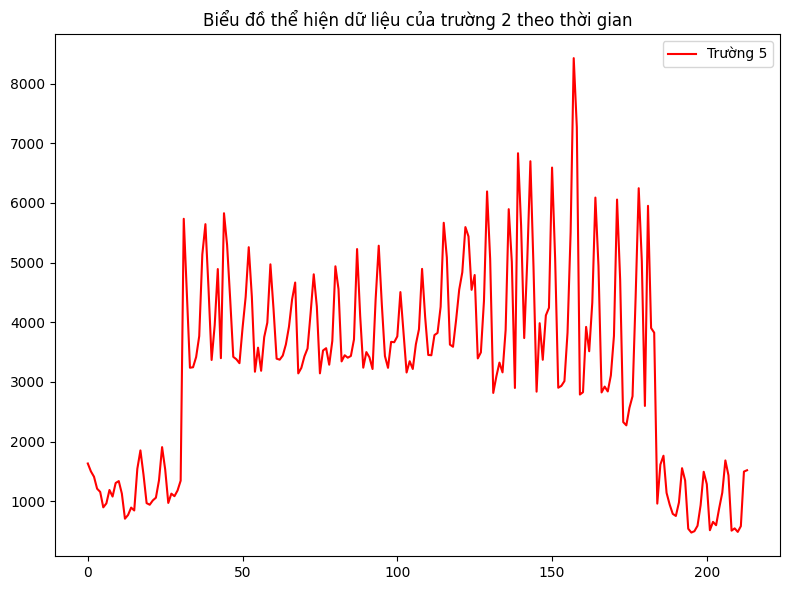

In [145]:
plt.figure(figsize=(8, 6))

plt.plot(range(data['truong_5'].shape[0]), data['truong_5'], 'red', label='Trường 5')
plt.title(f'Biểu đồ thể hiện dữ liệu của trường 2 theo thời gian')
plt.legend()

plt.tight_layout()
plt.show()

## Mô hình Sarima

In [146]:
# df=df[['date','truong_3']]

In [147]:
# df

In [148]:
# df.set_index('date', inplace=True)

In [149]:
train_df = df[:-15]
test_df = df[-15:]

In [150]:
SARIMA_model = auto_arima(train_df["truong_3"].values.reshape(-1,1), start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, 
                         m=6, #12 is the frequncy of the cycle
                         start_P=0, 
                         seasonal=True, #set to seasonal
                         d=None, 
                         D=1, #order of the seasonal differencing
                         trace=False,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)
print(SARIMA_model.summary())

                                       SARIMAX Results                                        
Dep. Variable:                                      y   No. Observations:                  199
Model:             SARIMAX(3, 0, 3)x(0, 1, [1, 2], 6)   Log Likelihood               -3293.894
Date:                                Tue, 04 Jun 2024   AIC                           6607.788
Time:                                        05:28:24   BIC                           6640.415
Sample:                                             0   HQIC                          6621.001
                                                - 199                                         
Covariance Type:                                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept  -7.598e+04    1.6e+05     -0.474      0.635    -3.9e+05    2.38e+05
ar.

In [151]:
sarima = SARIMAX(train_df['truong_3'].values.reshape(-1,1), 
                 order=(3,0,3),
                 seasonal_order=(0,1,1,6)).fit()
predictions = sarima.forecast(steps=15)

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.71710D+01    |proj g|=  1.01951D+00

At iterate    5    f=  1.67889D+01    |proj g|=  9.67924D-02


/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.



At iterate   10    f=  1.66462D+01    |proj g|=  6.33323D-02

At iterate   15    f=  1.66007D+01    |proj g|=  2.59779D-02

At iterate   20    f=  1.65980D+01    |proj g|=  4.14561D-03

At iterate   25    f=  1.65978D+01    |proj g|=  2.89156D-03

At iterate   30    f=  1.65977D+01    |proj g|=  1.40015D-02

At iterate   35    f=  1.65974D+01    |proj g|=  1.97425D-03

At iterate   40    f=  1.65974D+01    |proj g|=  5.53449D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     41     45      1     0     0   1.707D-05   1.660D+01
  F =   16.597385355208036     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

In [152]:
print(predictions)

[13567909.15659588  8766537.83955109  5522884.94330143  8993327.13638207
  9763032.83491153  6295083.1010228   7981218.70710666  9705960.71277191
  9134636.56251001  7257368.3315203   8014958.7314067   8191567.0957039
  8653025.18627475  8309666.22728938  9270770.13810547]


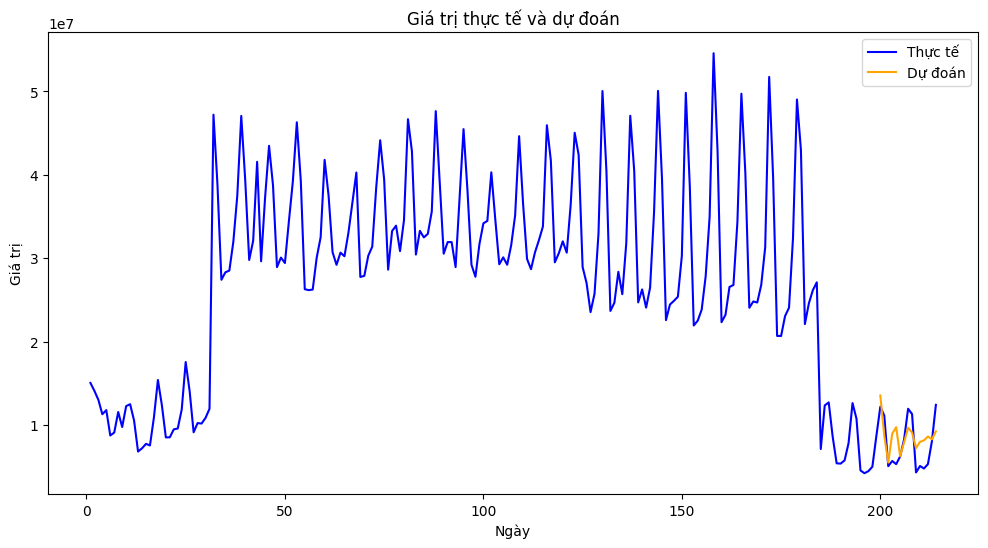

In [153]:
predicted_df = pd.DataFrame(predictions, index=test_df.index, columns=['predicted_truong3'])

plt.figure(figsize=(12, 6))

plt.plot(df['truong_3'], label='Thực tế', color='blue')

plt.plot(predicted_df['predicted_truong3'], label='Dự đoán', color='orange')

plt.xlabel('Ngày')
plt.ylabel('Giá trị')
plt.title('Giá trị thực tế và dự đoán')
plt.legend()
plt.show()

## Mô hình Arimax

In [154]:
ARIMAX_model = auto_arima(train_df['truong_3'].values.reshape(-1,1), 
                   exogenous=train_df['truong_1'], 
                   trace=True, 
                   error_action="ignore", 
                   suppress_warnings=True)
print(ARIMAX_model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=6791.298, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=6849.500, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=6850.616, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=6847.529, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=6847.506, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=6798.768, Time=0.08 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=6787.824, Time=0.08 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=6841.130, Time=0.07 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=6812.367, Time=0.04 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=6789.805, Time=0.13 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=6813.181, Time=0.05 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=6808.081, Time=0.30 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=6785.786, Time=0.11 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=6839.131, Time=0.05 sec
 ARIMA(2,1,0)(0,0,0)[0]          

In [155]:
arimax = SARIMAX(train_df['truong_3'].values.reshape(-1,1), 
                 order=(2,1,1),
                 exogenous=train_df['truong_1']).fit()
predictions = arimax.forecast(steps=15)

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.70887D+01    |proj g|=  6.18461D-02

At iterate    5    f=  1.70298D+01    |proj g|=  1.19071D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      9     13      1     0     0   1.549D-05   1.703D+01
  F =   17.029613031674643     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['exogenous']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
 This problem is unconstrained.


In [156]:
print(predictions)

[9243961.67344921 7923133.71740125 6860168.02176431 6802811.20328881
 7248878.26540375 7549971.27014349 7533638.02948544 7387192.26948019
 7304268.60923994 7319453.64607505 7366377.19868429 7388439.94191846
 7380794.49717512 7366086.38251541 7360477.85996221]


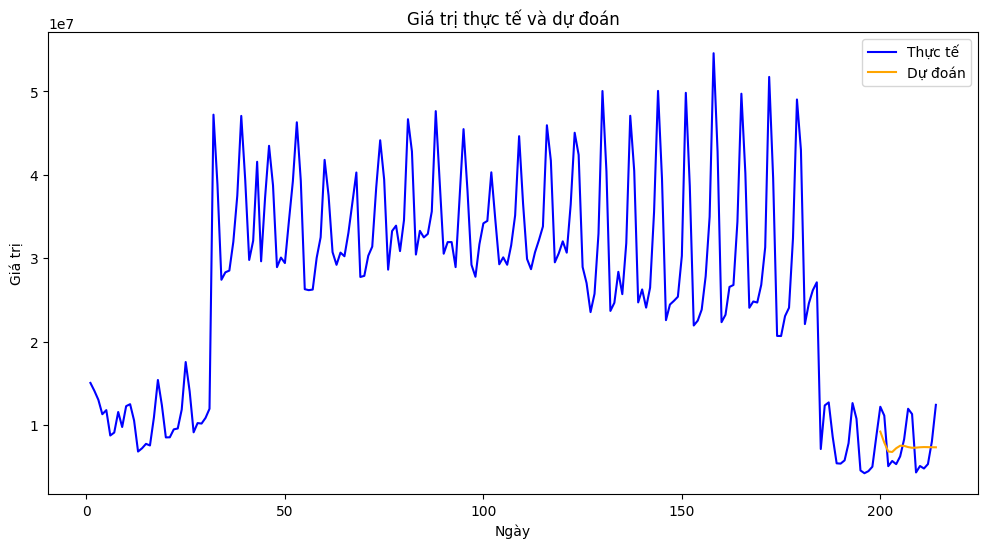

In [157]:
predicted_df = pd.DataFrame(predictions, index=test_df.index, columns=['predicted_truong3'])

plt.figure(figsize=(12, 6))

plt.plot(df['truong_3'], label='Thực tế', color='blue')

plt.plot(predicted_df['predicted_truong3'], label='Dự đoán', color='orange')

plt.xlabel('Ngày')
plt.ylabel('Giá trị')
plt.title('Giá trị thực tế và dự đoán')
plt.legend()
plt.show()